<a href="https://colab.research.google.com/github/Anusarakh/DPDM2021/blob/main/Chap8_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-means

## Generate Data

In [1]:
from sklearn.datasets import make_blobs

In [2]:
X, y = make_blobs(n_samples=500, centers=3, n_features=2, random_state=6)

## Explore data

In [3]:
X.shape

(500, 2)

In [4]:
y[:10]

array([0, 2, 2, 2, 0, 1, 0, 2, 0, 1])

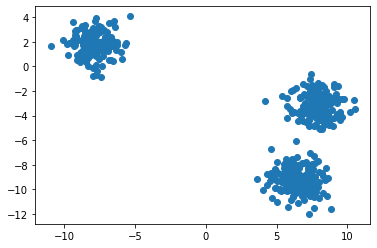

In [5]:
from matplotlib import pyplot as plt 
plt.scatter(X[:,0],X[:,1])

# Clustering

## Import

In [6]:
from sklearn.cluster import KMeans # import code cluster 

## Define

In [7]:
kmeans = KMeans(n_clusters=2, random_state=6)

## Fit-Predict

In [8]:
y_clust = kmeans.fit_predict(X)
y_clust

array([1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,

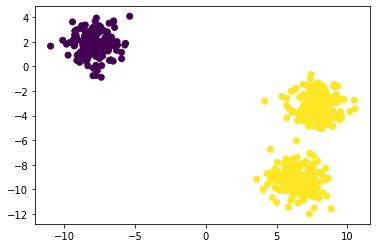

In [9]:
plt.scatter(X[:,0],X[:,1],c=y_clust)

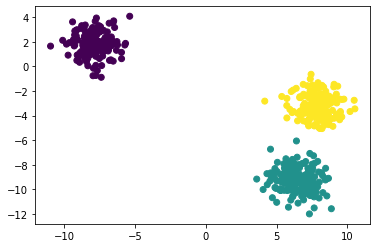

In [10]:
#define
kmeans = KMeans(n_clusters=3, random_state=6)
#fit-predict
y_clust = kmeans.fit_predict(X)
#plot
plt.scatter(X[:,0],X[:,1],c=y_clust)

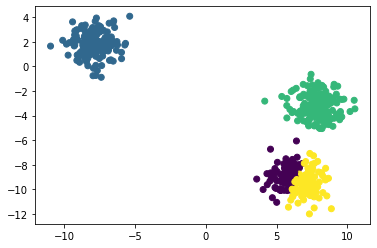

In [11]:
#define
kmeans = KMeans(n_clusters=4, random_state=6)
#fit-predict
y_clust = kmeans.fit_predict(X)
#plot
plt.scatter(X[:,0],X[:,1],c=y_clust)

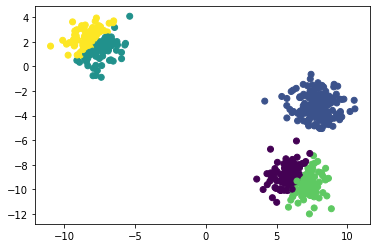

In [12]:
#define
kmeans = KMeans(n_clusters=5, random_state=14, init = 'random')
#fit-predict
y_clust = kmeans.fit_predict(X)
#plot
plt.scatter(X[:,0],X[:,1],c=y_clust)

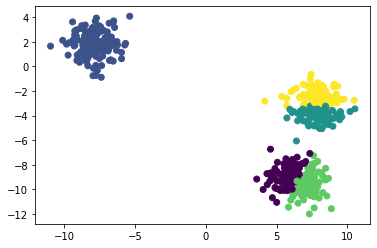

In [13]:
#define
kmeans = KMeans(n_clusters=5, random_state=6, init = 'random')
#fit-predict
y_clust = kmeans.fit_predict(X)
#plot
plt.scatter(X[:,0],X[:,1],c=y_clust)

# Example Application (Color Quantization)

In [14]:
import cv2
import os

In [15]:
img = cv2.imread('/content/MicrosoftTeams-image.png')

In [16]:
img.shape

(613, 928, 3)

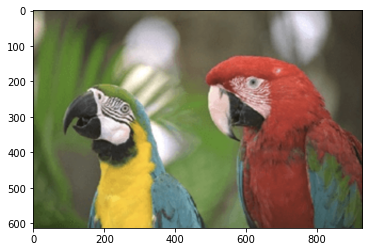

In [17]:
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)

## นับจำนวนสี

In [19]:
import numpy as np

In [20]:
allcolor = np.unique(np.reshape(RGB_img,(RGB_img.shape[0]*RGB_img.shape[1],3)),axis=0)
allcolor.shape

(41459, 3)

## จัดกลุ่มสีให้เหลือ 8 สี

In [21]:
myquantize = KMeans(n_clusters=8,random_state=6) #kmeans define

### แปลงข้อมูลให้อยู่ในรูป row-column

นับจำนวน pixel ในภาพ

In [22]:
img_row = np.reshape(RGB_img,(RGB_img.shape[0]*RGB_img.shape[1],3))
img_row.shape

(568864, 3)

In [23]:
final_color = myquantize.fit_predict(allcolor) #kmeans fit-predict

### ใช้ centroid เป็นตัวแทนของสี

In [24]:
centroid = myquantize.cluster_centers_

In [26]:
centroid

array([[ 72.86235324,  72.6936048 ,  54.88571072],
       [181.37091472, 167.34616128, 157.3123187 ],
       [207.24769993, 179.64189667,  70.92993631],
       [179.28267595,  95.09512761,  82.28190255],
       [130.67194149, 141.75585106, 119.57034574],
       [220.09303521, 208.99049088, 205.57543048],
       [103.19196155, 113.1762119 ,  79.61720188],
       [127.75468649,  65.67679379,  55.72495152]])

### แทนสีคืนลงไป

In [27]:
new_img = np.zeros(RGB_img.shape)
for i in range(RGB_img.shape[0]):
    for j in range(RGB_img.shape[1]):
        new_img[i,j,:] = centroid[myquantize.predict([RGB_img[i,j,:]]),:]

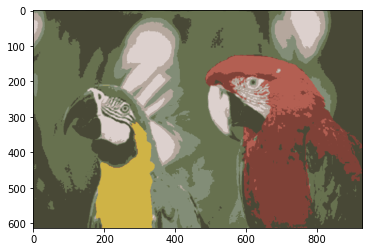

In [28]:
plt.imshow(new_img/255)

plt.imsave('img.jpg',new_img/255)

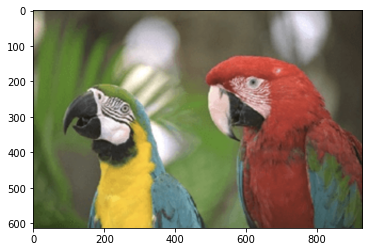

In [29]:
plt.imshow(RGB_img)

# Hierachical Clustering

https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py

#Clustering Evaluation

https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation